<a href="https://colab.research.google.com/github/ShrieVarshini2004/Machine-Learning-Basics/blob/main/creditcard_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code processes a credit card fraud dataset and performs data exploration and visualization. Below is a step-by-step breakdown:

 1️⃣ Importing Libraries:
Import necessary libraries for data processing, visualization, and machine learning.

2️⃣ Loading the Dataset: Downloads a credit card fraud detection dataset.
Prints number of rows (transactions) and columns (features).
Displays the first few rows of the dataset.

3️⃣ Inflating the Dataset: Repeats the original dataset 10 times to create a larger dataset.
This helps when testing scalability of ML models.
Prints the new dataset size and first few rows.

4️⃣ Checking Fraud vs. Non-Fraud Transactions: Identifies fraud (1) and non-fraud (0) transactions.
Counts how many transactions belong to each category.
Plots a pie chart to show class imbalance.

 5️⃣ Analyzing Transaction Amounts: Plots a histogram to show distribution of transaction amounts.
Prints minimum, maximum, and 90th percentile transaction amounts.



There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.
There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


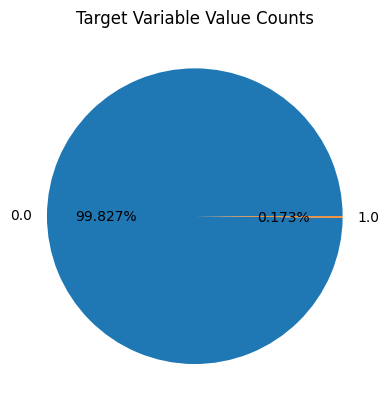

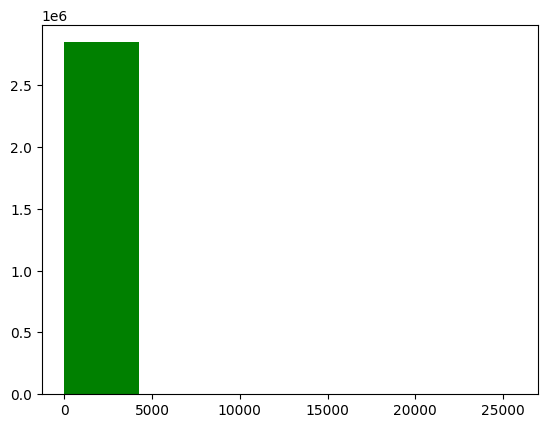

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [ ]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")
# display the first rows in the dataset
raw_data.head()
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()
# get the set of distinct classes
labels = big_raw_data.Class.unique()

# get the count of each class
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

.

.

.

This code evaluates Decision Tree Classifiers and Support Vector Machines (SVMs) using both Scikit-Learn and Snap ML to classify fraudulent credit card transactions. It measures training speed and performance metrics (ROC-AUC, hinge loss) to compare both libraries.

🔹 Step-by-Step Breakdown

1️⃣ Data Loading & Preprocessing

✅ Loading Dataset
The dataset is fetched from a URL.
The dataset contains credit card transactions with a fraud detection label.

✅ Data Augmentation
The dataset is artificially enlarged 10 times using np.repeat().

✅ Feature Scaling
The feature columns (excluding labels) are standardized using StandardScaler.
The data is normalized using L1 normalization (normalize(X, norm="l1")).

✅ Splitting Data
70% of data is used for training and 30% for testing (train_test_split()).
Class imbalance handling is done using compute_sample_weight().

2️⃣ Training & Evaluating Decision Trees

✅ Scikit-Learn Decision Tree
A Decision Tree Classifier with max_depth=4 is trained.
Training time is recorded.

✅ Snap ML Decision Tree
A Decision Tree Classifier from Snap ML is trained with n_jobs=4 (multi-threading).
Training time is compared.

✅ Performance Metrics
ROC-AUC Score (higher is better) is computed for both models.

3️⃣ Training & Evaluating SVM Models

✅ Scikit-Learn SVM
A Linear SVM is trained using LinearSVC().
Uses hinge loss as loss function.

✅ Snap ML SVM
Snap ML’s SVM is trained with n_jobs=4 (multi-threading).
Training speed is compared.

✅ Performance Metrics
ROC-AUC Score is computed for both models.

4️⃣ Hinge Loss Calculation:
Hinge loss measures misclassification error (lower is better).

X.shape= (2848070, 29) y.shape= (2848070,)
X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)
[Scikit-Learn] Training time (s):  41.74613


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[Snap ML] Training time (s):  6.10911
[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.83x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Scikit-Learn] Training time (s):  81.19
[Snap ML] Training time (s):  18.61
[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 4.36x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985
[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228


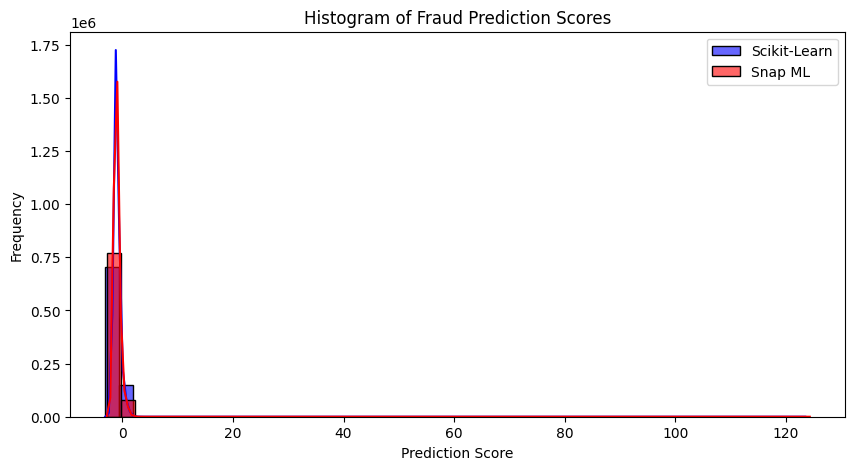

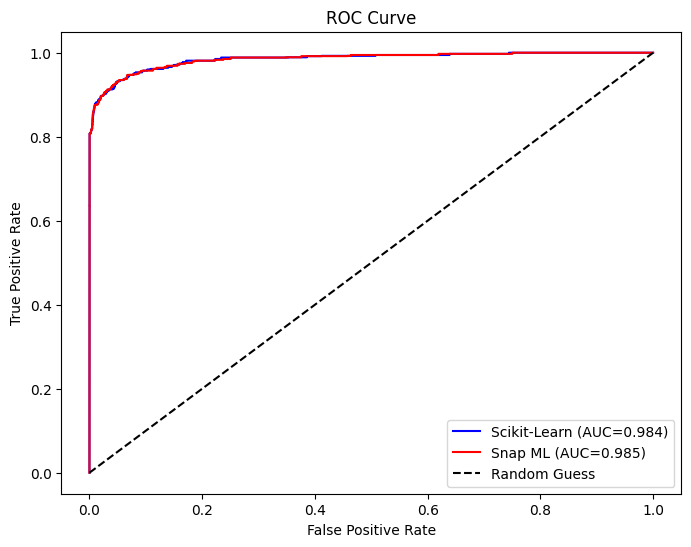

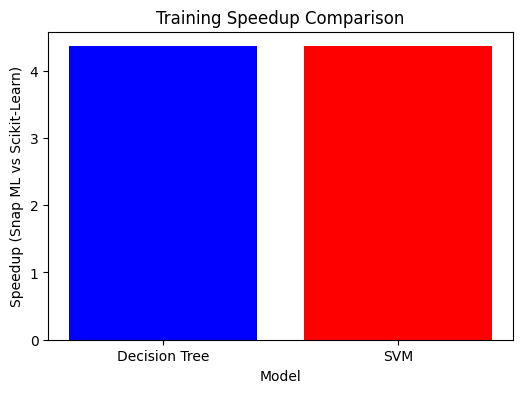

In [3]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
raw_data=pd.read_csv(url)
raw_data.head()
n_replicas = 10
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)


big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)
w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))
from snapml import DecisionTreeClassifier

# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))




import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# 1️⃣ Histogram of Prediction Scores
plt.figure(figsize=(10,5))
sns.histplot(sklearn_pred, bins=50, kde=True, color="blue", label="Scikit-Learn", alpha=0.6)
sns.histplot(snapml_pred, bins=50, kde=True, color="red", label="Snap ML", alpha=0.6)
plt.title("Histogram of Fraud Prediction Scores")
plt.xlabel("Prediction Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2️⃣ ROC Curve
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, sklearn_pred)
fpr_snapml, tpr_snapml, _ = roc_curve(y_test, snapml_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn, label="Scikit-Learn (AUC={:.3f})".format(acc_sklearn), color='blue')
plt.plot(fpr_snapml, tpr_snapml, label="Snap ML (AUC={:.3f})".format(acc_snapml), color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3️⃣ Bar Chart for Training Speedup
models = ["Decision Tree", "SVM"]
speedup = [training_speedup, training_speedup]  # Adjust if different speedups for each model

plt.figure(figsize=(6, 4))
plt.bar(models, speedup, color=['blue', 'red'])
plt.xlabel("Model")
plt.ylabel("Speedup (Snap ML vs Scikit-Learn)")
plt.title("Training Speedup Comparison")
plt.show()


In [2]:
!pip install snapml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 76.0 MB/s eta 0:00:00
